In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


**Preprocessing**

In [4]:
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop(['flight'],axis=1)
df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955


In [5]:
df.stops=pd.factorize(df.stops)[0]

In [6]:
df=df.join(pd.get_dummies(df.airline,prefix='airline',dtype=int)).drop('airline',axis=1)
df=df.join(pd.get_dummies(df.source_city,prefix='source',dtype=int)).drop('source_city',axis=1)
df=df.join(pd.get_dummies(df.destination_city,prefix='dest',dtype=int)).drop('destination_city',axis=1)
df=df.join(pd.get_dummies(df.arrival_time,prefix='arrival',dtype=int)).drop('arrival_time',axis=1)
df=df.join(pd.get_dummies(df.departure_time,prefix='departure',dtype=int)).drop('departure_time',axis=1)

In [7]:
df.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


**Training Regression Model**

In [9]:
from sklearn.ensemble import RandomForestRegressor as RG
from sklearn.model_selection import train_test_split
X,y=df.drop(['price'],axis=1),df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
reg=RG(n_jobs=-1)
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [11]:
reg.score(X_test,y_test)

0.9849231719014282

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=reg.predict(X_test)

In [14]:
print("R2 score",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9849231719014282
MSE 7771837.626458846
MAE 1077.3028538129458
RMSE 2787.801575876383


Text(0.5, 1.0, 'Actual Vs Predicted')

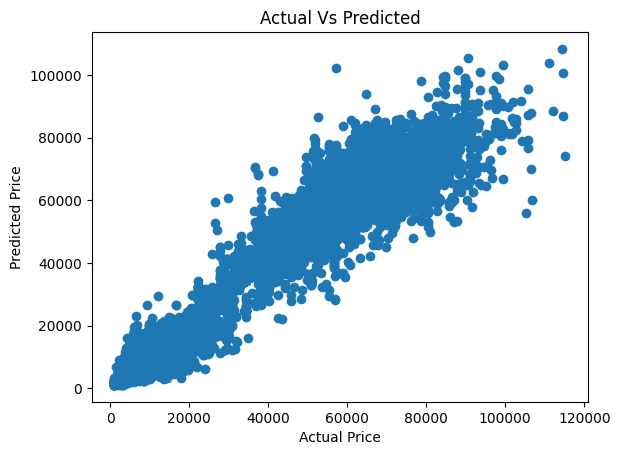

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Vs Predicted")

In [17]:
imp=dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_imp=sorted(imp.items(),key=lambda x:x[1],reverse=True)
sorted_imp

[('class', 0.8798916407705795),
 ('duration', 0.057731626342016444),
 ('days_left', 0.01848933539487698),
 ('airline_Vistara', 0.005523886467274769),
 ('airline_Air_India', 0.004442982225450415),
 ('source_Delhi', 0.0036521725118564274),
 ('dest_Delhi', 0.003395241203884314),
 ('source_Mumbai', 0.0022769386655346925),
 ('dest_Mumbai', 0.0019271497527199013),
 ('stops', 0.0018953703847369003),
 ('source_Kolkata', 0.001745127513262159),
 ('dest_Kolkata', 0.0017399837425709343),
 ('arrival_Evening', 0.001528232870792274),
 ('dest_Hyderabad', 0.001517556575875992),
 ('dest_Bangalore', 0.0013609276448768156),
 ('source_Hyderabad', 0.001243673389626621),
 ('arrival_Night', 0.0011393907944478962),
 ('source_Bangalore', 0.0011157676501878987),
 ('departure_Evening', 0.0010789897314976002),
 ('arrival_Afternoon', 0.000965853202970801),
 ('source_Chennai', 0.0008842508462710102),
 ('departure_Morning', 0.0008842390701421793),
 ('dest_Chennai', 0.0008463496009638245),
 ('departure_Afternoon', 0.0

<BarContainer object of 5 artists>

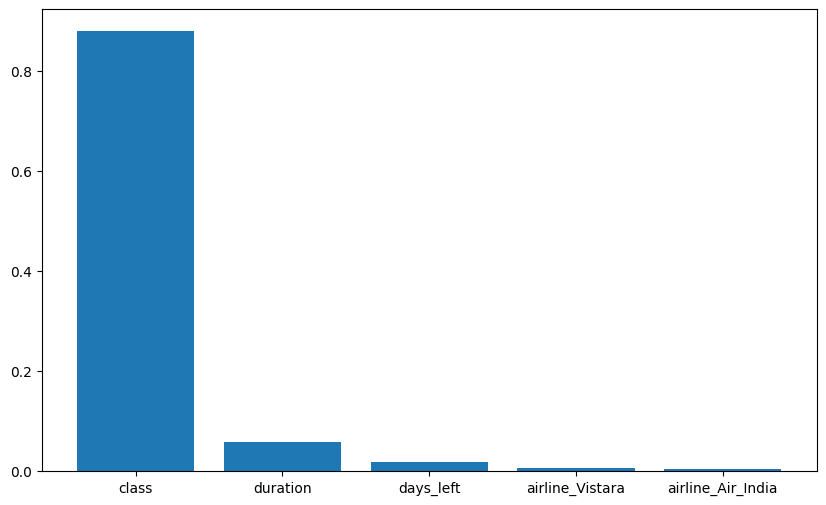

In [23]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_imp[:5]],[x[1] for x in sorted_imp[:5]])

**Hyperparameter Tuning**

In [21]:
from sklearn.model_selection import RandomizedSearchCV as RS
from scipy.stats import randint
param_dist={
    'n_estimators':randint(100,300)
    ,'max_depth':randint(1,10)
    ,'min_samples_split':randint(2,10)
    ,'min_samples_leaf':randint(1,10)
    ,'max_features':[1.0,'auto','sqrt']
}
reg=RG(n_jobs=-1)
random_search=RS(estimator=reg,param_distributions=param_dist,n_iter=2,n_jobs=-1,
                cv=3,random_state=10,scoring='neg_mean_squared_error',verbose=2)
random_search.fit(X_train,y_train)
best_regressor=random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [24]:
best_regressor.score(X_test,y_test)

0.9419832090507736

In [25]:
y_pred=best_regressor.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9419832090507736
MSE 29906627.303677235
MAE 3177.0190423487575
RMSE 5468.695210347459
